<a href="https://colab.research.google.com/github/sebastian-dv/CSE-151A-Project/blob/main/SUPPORT2_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 151A Group Project
# Names

- Pranav Prabu
- Sebastian Diaz
- Jou-Chih Chang
- Juan Yin
- Irving Zhao
- Xianzhe Guo
- Tiankuo Li

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
support2 = fetch_ucirepo(id=880)

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/880/data.csv')

df = df[['age','sex','death','dzgroup','scoma','race','sps','aps','diabetes','dementia','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph']]

## Initial Preprocessing

In [5]:
ohe = pd.get_dummies(df[['race']])
df = df.drop(['race'], axis = 1)
df = pd.concat([df, ohe], axis = 1)

In [6]:
df = df.dropna(axis = 0, how = 'any')
df['sex'].replace('female', 0, inplace=True)
df['sex'].replace('male', 1, inplace=True)

In [7]:
targets = df['dzgroup']
features = (df.drop('dzgroup', axis = 1))

scaler = MinMaxScaler()
scaler.fit(features)

MinMaxScaler()

## Logistic Regression (For Each Target)

In [8]:
targets_ohe = pd.get_dummies(targets)

The accuracy for predicting the disease ARF/MOSF w/Sepsis is: 0.6753472222222222
Training Accuracy: 0.6785714285714286

Test Accuracy: 0.6753472222222222

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       642
           1       0.64      0.60      0.62       510

    accuracy                           0.68      1152
   macro avg       0.67      0.67      0.67      1152
weighted avg       0.67      0.68      0.67      1152


Test Confusion Matrix:
[[473 169]
 [205 305]]


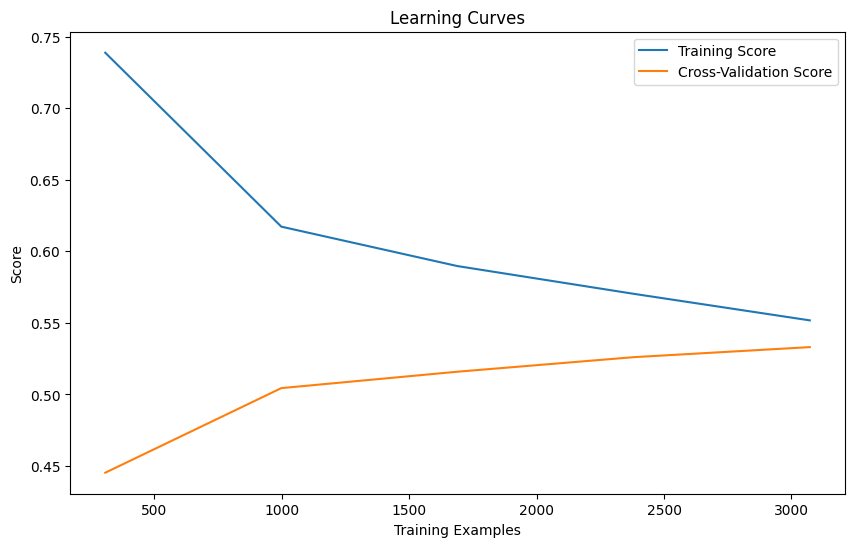

The accuracy for predicting the disease CHF is: 0.8732638888888888
Training Accuracy: 0.8891369047619048

Test Accuracy: 0.8732638888888888

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1003
           1       0.57      0.08      0.14       149

    accuracy                           0.87      1152
   macro avg       0.73      0.54      0.54      1152
weighted avg       0.84      0.87      0.83      1152


Test Confusion Matrix:
[[994   9]
 [137  12]]


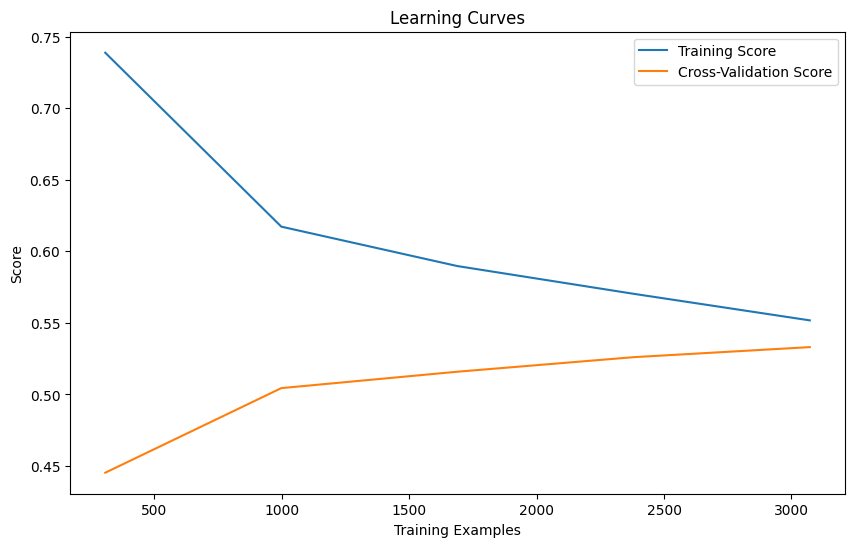

The accuracy for predicting the disease COPD is: 0.8845486111111112
Training Accuracy: 0.8813244047619048

Test Accuracy: 0.8845486111111112

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1018
           1       0.56      0.04      0.07       134

    accuracy                           0.88      1152
   macro avg       0.72      0.52      0.50      1152
weighted avg       0.85      0.88      0.84      1152


Test Confusion Matrix:
[[1014    4]
 [ 129    5]]


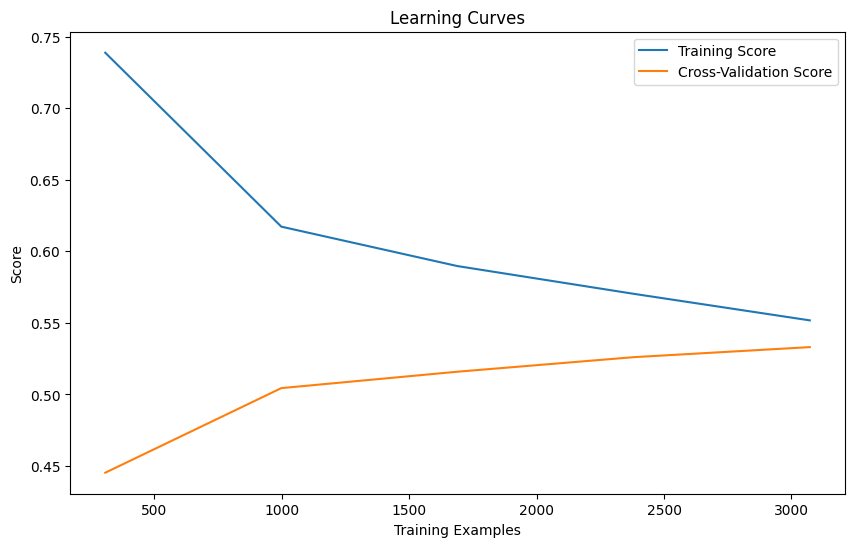

The accuracy for predicting the disease Cirrhosis is: 0.9470486111111112
Training Accuracy: 0.9319196428571429

Test Accuracy: 0.9470486111111112

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1085
           1       1.00      0.09      0.16        67

    accuracy                           0.95      1152
   macro avg       0.97      0.54      0.57      1152
weighted avg       0.95      0.95      0.93      1152


Test Confusion Matrix:
[[1085    0]
 [  61    6]]


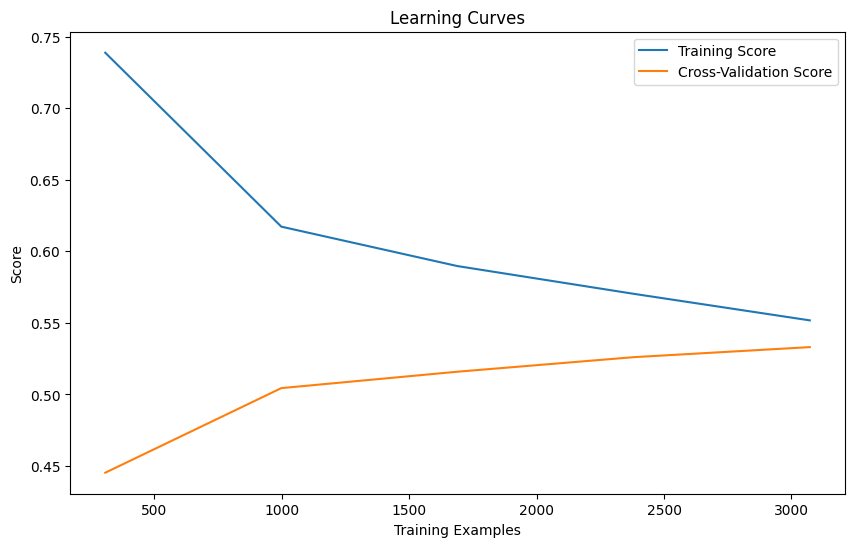

The accuracy for predicting the disease Colon Cancer is: 0.9809027777777778
Training Accuracy: 0.9720982142857143

Test Accuracy: 0.9809027777777778

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1129
           1       1.00      0.04      0.08        23

    accuracy                           0.98      1152
   macro avg       0.99      0.52      0.54      1152
weighted avg       0.98      0.98      0.97      1152


Test Confusion Matrix:
[[1129    0]
 [  22    1]]


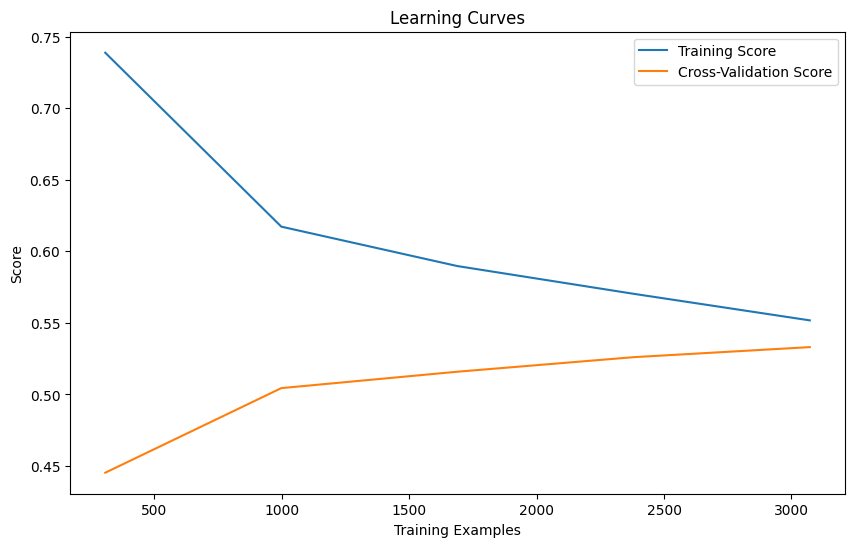

The accuracy for predicting the disease Coma is: 0.9392361111111112
Training Accuracy: 0.9527529761904762

Test Accuracy: 0.9392361111111112

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1060
           1       0.73      0.38      0.50        92

    accuracy                           0.94      1152
   macro avg       0.84      0.68      0.73      1152
weighted avg       0.93      0.94      0.93      1152


Test Confusion Matrix:
[[1047   13]
 [  57   35]]


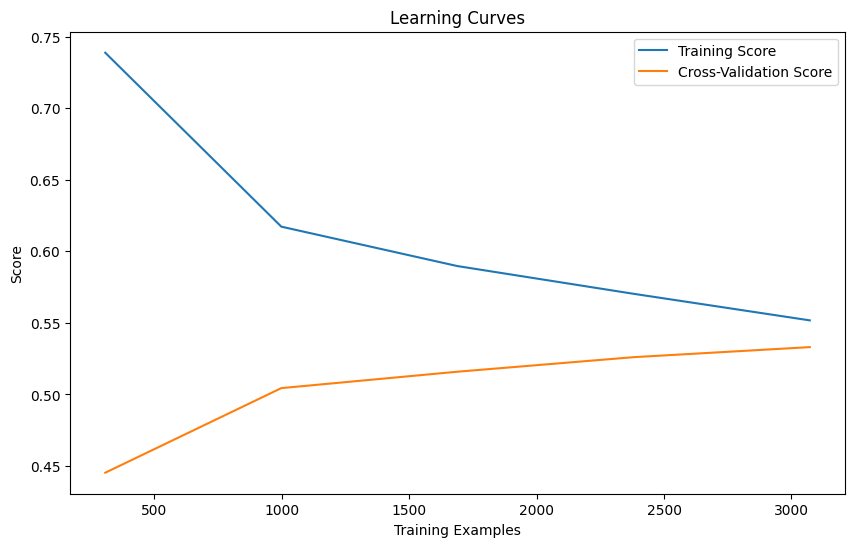

The accuracy for predicting the disease Lung Cancer is: 0.9322916666666666
Training Accuracy: 0.9386160714285714

Test Accuracy: 0.9322916666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1077
           1       0.42      0.11      0.17        75

    accuracy                           0.93      1152
   macro avg       0.68      0.55      0.57      1152
weighted avg       0.91      0.93      0.91      1152


Test Confusion Matrix:
[[1066   11]
 [  67    8]]


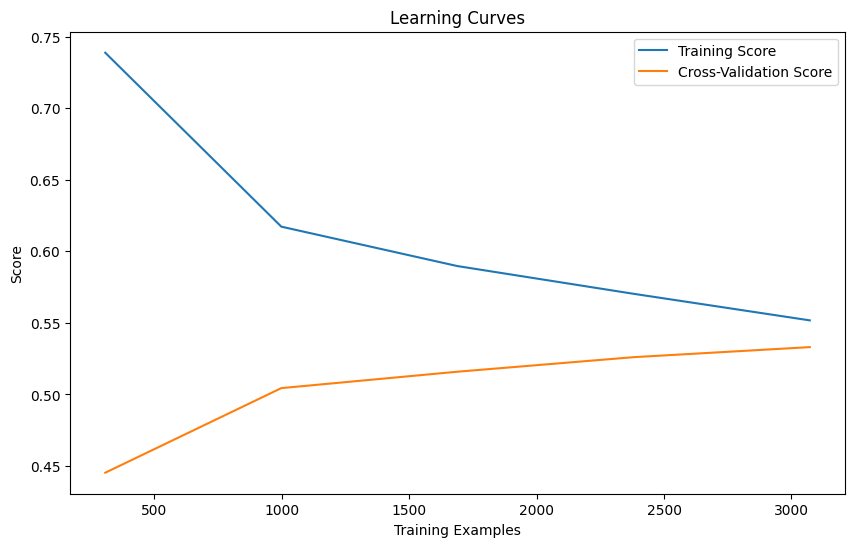

The accuracy for predicting the disease MOSF w/Malig is: 0.9166666666666666
Training Accuracy: 0.9140625

Test Accuracy: 0.9166666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1050
           1       0.69      0.11      0.19       102

    accuracy                           0.92      1152
   macro avg       0.80      0.55      0.57      1152
weighted avg       0.90      0.92      0.89      1152


Test Confusion Matrix:
[[1045    5]
 [  91   11]]


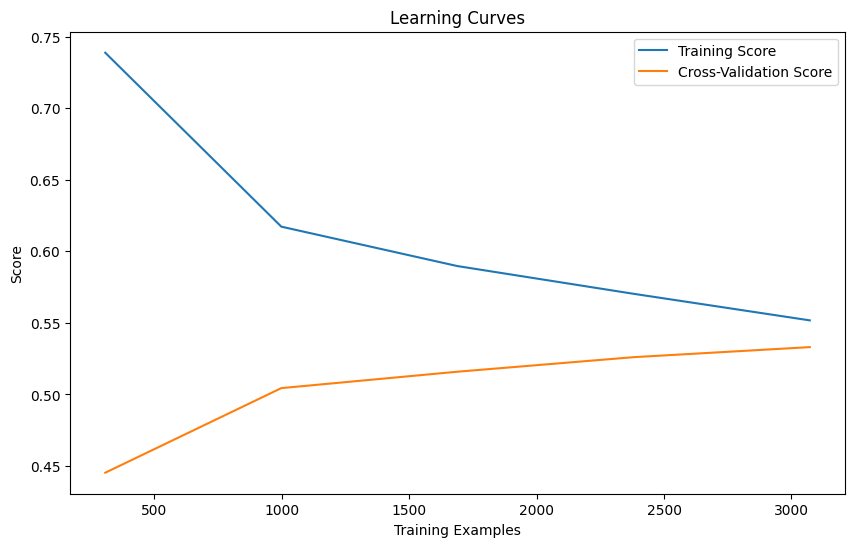

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

for i in targets_ohe.columns:
  X_train, X_test, y_train, y_test = train_test_split(features, targets_ohe[i], test_size=0.3, random_state=0)
  logreg = LogisticRegression(max_iter = 1000, solver = 'liblinear')
  logregmodel = logreg.fit(X_train, y_train)
  yhat_train = logreg.predict(X_train)
  yhat_test = logreg.predict(X_test)
  print('The accuracy for predicting the disease '+ i + ' is: ' + str(logreg.score(X_test, y_test)))

  train_accuracy = accuracy_score(y_train, yhat_train)
  print("Training Accuracy:", train_accuracy)

  test_accuracy = accuracy_score(y_test, yhat_test)
  print("\nTest Accuracy:", test_accuracy)

  print("\nClassification Report:")
  print(classification_report(y_test, yhat_test))

  conf_matrix = confusion_matrix(y_test, yhat_test)
  print("\nTest Confusion Matrix:")
  print(conf_matrix)

  from sklearn.model_selection import learning_curve

  X = features
  y = targets

  # Assuming you have X, y, and a model
  train_sizes, train_scores, test_scores = learning_curve(logreg, X, y, cv=5, scoring='accuracy', n_jobs=-1)

  # Calculate mean training and testing scores
  train_scores_mean = np.mean(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)

  # Plot learning curves
  plt.figure(figsize=(10, 6))
  plt.plot(train_sizes, train_scores_mean, label='Training Score')
  plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
  plt.xlabel('Training Examples')
  plt.ylabel('Score')
  plt.title('Learning Curves')
  plt.legend()
  plt.show()


## Logistic Regression (Multiclass)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logregmodel = logreg.fit(X_train, y_train)
yhat_train = logreg.predict(X_train)
yhat_test = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
logreg.score(X_test, y_test)

0.5451388888888888

In [12]:
logreg.score(X_train, y_train)

0.5528273809523809

In [13]:
print(classification_report(y_test, yhat_test))

                   precision    recall  f1-score   support

ARF/MOSF w/Sepsis       0.56      0.89      0.68       510
              CHF       0.44      0.30      0.35       149
             COPD       0.50      0.31      0.38       134
        Cirrhosis       0.58      0.10      0.18        67
     Colon Cancer       1.00      0.04      0.08        23
             Coma       0.75      0.51      0.61        92
      Lung Cancer       0.38      0.37      0.38        75
     MOSF w/Malig       1.00      0.07      0.13       102

         accuracy                           0.55      1152
        macro avg       0.65      0.32      0.35      1152
     weighted avg       0.59      0.55      0.49      1152



Training Accuracy: 0.5528273809523809

Test Accuracy: 0.5451388888888888

Classification Report:
                   precision    recall  f1-score   support

ARF/MOSF w/Sepsis       0.56      0.89      0.68       510
              CHF       0.44      0.30      0.35       149
             COPD       0.50      0.31      0.38       134
        Cirrhosis       0.58      0.10      0.18        67
     Colon Cancer       1.00      0.04      0.08        23
             Coma       0.75      0.51      0.61        92
      Lung Cancer       0.38      0.37      0.38        75
     MOSF w/Malig       1.00      0.07      0.13       102

         accuracy                           0.55      1152
        macro avg       0.65      0.32      0.35      1152
     weighted avg       0.59      0.55      0.49      1152


Test Confusion Matrix:
[[453  19  13   1   0  13  11   0]
 [ 79  44  11   2   0   1  12   0]
 [ 72  12  41   2   0   0   7   0]
 [ 54   1   1   7   0   1   3   0]
 [  8   3   5   0   1   0   

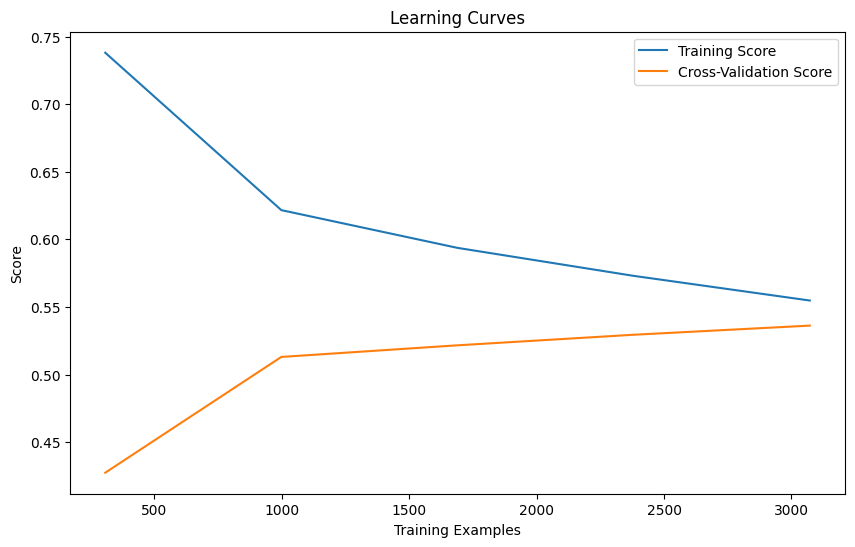

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

train_accuracy = accuracy_score(y_train, yhat_train)
print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, yhat_test)
print("\nTest Accuracy:", test_accuracy)

print("\nClassification Report:")
print(classification_report(y_test, yhat_test))

conf_matrix = confusion_matrix(y_test, yhat_test)
print("\nTest Confusion Matrix:")
print(conf_matrix)

from sklearn.model_selection import learning_curve

X = features
y = targets

# Assuming you have X, y, and a model
train_sizes, train_scores, test_scores = learning_curve(logreg, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()

Based on the following results, with a higher training score and a slightly lower cross-validation score, this indicates that there is overfitting in the model, and therefore may not be the best model for producing the correct output.